In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Loading and Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the singlecell_classification data
data_path = '/content/drive/MyDrive/chen_singlecell_classification.txt'
singlecell_classification = pd.read_csv(data_path, sep='\t', names=['reference', 'tumourID', 'CellType'])
singlecell_classification = singlecell_classification.iloc[1:]

display(singlecell_classification)

,reference,tumourID,CellType
1,AAACCTGAGAGATGAG-1,SC159,Epithelial cells
2,TGAGGGAGTCATATGC-1,SC159,Others
3,CTAATGGTCCCAGGTG-1,SC159,Fibroblasts
4,CTAGAGTTCTGGCGAC-1,SC159,Epithelial cells
5,CTCGGAGGTGGTGTAG-1,SC159,Epithelial cells
...,...,...,...
21781,CGATCGGGTCTGCCAG-13,SC153,Macrophages
21782,CCACTACGTAGCGCAA-13,SC153,Macrophages
21783,CACCTTGAGGAGCGTT-13,SC153,Macrophages
21784,ACGAGCCTCATGTGGT-13,SC153,Epithelial cells


In [ ]:
column_delimiter = '\t'
rna_data = pd.read_csv('/content/drive/MyDrive/merge.txt', sep=column_delimiter)
display(rna_data)

KeyboardInterrupt: ignored

In [ ]:
rna_data_t = rna_data.T
# delete duplicate gene
rna_data_t = rna_data_t.drop_duplicates()

rna_data_t= rna_data_t.reset_index(drop=False)
rna_data_t = rna_data_t.rename(columns={'index': 'reference'})
merged_df = singlecell_classification.merge(rna_data_t, on='reference', how='left')
display(merged_df)

In [ ]:
# Round every numerical value in df to 3 decimal places
df_rounded = merged_df.round(3)
# delete gene that only has value 0
df_rounded = df_rounded.loc[:, (df_rounded != 0).any(axis=0)]
df_rounded

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC011043.1,AL592183.1,AC007325.1,AC007325.4,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,AAACCTGAGAGATGAG-1,SC159,Epithelial cells,0.0,0.0,0.321,0.563,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0
1,TGAGGGAGTCATATGC-1,SC159,Others,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0
2,CTAATGGTCCCAGGTG-1,SC159,Fibroblasts,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.514,0.0,0.0,0.0,0.0,0.000,0.0
3,CTAGAGTTCTGGCGAC-1,SC159,Epithelial cells,0.0,0.0,0.000,0.685,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0
4,CTCGGAGGTGGTGTAG-1,SC159,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21780,CGATCGGGTCTGCCAG-13,SC153,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.896,0.0
21781,CCACTACGTAGCGCAA-13,SC153,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0
21782,CACCTTGAGGAGCGTT-13,SC153,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0
21783,ACGAGCCTCATGTGGT-13,SC153,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0


we now have 24790 features and 21785 data sample




In [ ]:
# we only select top 5 frequent tumour for research
selected_df = df_rounded[df_rounded['tumourID'].isin(['SC156', 'SC174', 'SC177','SC172','SC162'])]
display(selected_df)

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC011043.1,AL592183.1,AC007325.1,AC007325.4,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
907,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
908,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
909,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
910,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.547
911,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21111,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21112,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21113,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
selected_df = selected_df.loc[:, (selected_df != 0).any(axis=0)]
selected_df

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
907,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
908,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
909,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
910,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
911,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21111,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21112,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21113,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


## we now have 15495 data sample and 23990 features

In [ ]:
selected_df.to_csv('/content/drive/MyDrive/fulldata.csv', index=False)

In [ ]:
# Load the singlecell_classification data
data_path = '/content/drive/MyDrive/fulldata.csv'
# Read the CSV data
selected_df = pd.read_csv(data_path)
selected_df

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
selected_df['is_Epithelial_cells'] = selected_df['CellType'].apply(lambda x: 1 if x == 'Epithelial cells' else 0)

counts = selected_df['is_Epithelial_cells'].value_counts()

print(counts)
display(selected_df)

1    12345
0     3150
Name: is_Epithelial_cells, dtype: int64


,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1,is_Epithelial_cells
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547,1
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1


In [ ]:
# 1. Count the number of unique tumours
num_tumours = selected_df['tumourID'].nunique()
print(f"Number of unique tumours: {num_tumours}")

# 2. Count the number of cell samples for each tumour
tumour_counts = selected_df.groupby('tumourID').size().reset_index(name='numCellSamples')
print("Number of cell samples for each tumour:")
display(tumour_counts)

# 3. Count the number of cells in each CellType for each tumour
tumour_celltype_counts = selected_df.groupby(['tumourID', 'CellType']).size().reset_index(name='Count')
print("Number of cells in each CellType for each tumour:")
display(tumour_celltype_counts)

# 4. Count the number of cell samples for each CellType across all tumors
celltype_counts = selected_df.groupby('CellType').size().reset_index(name='CellSamples')
display(celltype_counts)

num_celltypebinary = selected_df['is_Epithelial_cells'].nunique()
display(f"Number of is_Epithelial_cells: {num_celltypebinary}")
num_celltypebinary_counts = selected_df.groupby(['tumourID', 'is_Epithelial_cells']).size().reset_index(name='Count')
display(num_celltypebinary_counts)

num_celltypebinary_counts1 = selected_df.groupby(['is_Epithelial_cells']).size().reset_index(name='Count')
display(num_celltypebinary_counts1)

Number of unique tumours: 5
Number of cell samples for each tumour:


,tumourID,numCellSamples
0,SC156,4744
1,SC162,2197
2,SC172,2376
3,SC174,3342
4,SC177,2836


Number of cells in each CellType for each tumour:


,tumourID,CellType,Count
0,SC156,CD8+ T-cells,2
1,SC156,DC,1
2,SC156,Endothelial cells,26
3,SC156,Epithelial cells,4649
4,SC156,Fibroblasts,9
5,SC156,HSC,4
6,SC156,Macrophages,29
7,SC156,Monocytes,14
8,SC156,NK cells,1
9,SC156,Others,9


,CellType,CellSamples
0,B-cells,25
1,CD4+ T-cells,28
2,CD8+ T-cells,63
3,DC,8
4,Endothelial cells,1030
5,Epithelial cells,12345
6,Fibroblasts,576
7,HSC,292
8,Macrophages,375
9,Monocytes,220


'Number of is_Epithelial_cells: 2'

,tumourID,is_Epithelial_cells,Count
0,SC156,0,95
1,SC156,1,4649
2,SC162,0,475
3,SC162,1,1722
4,SC172,0,600
5,SC172,1,1776
6,SC174,0,1841
7,SC174,1,1501
8,SC177,0,139
9,SC177,1,2697


,is_Epithelial_cells,Count
0,0,3150
1,1,12345


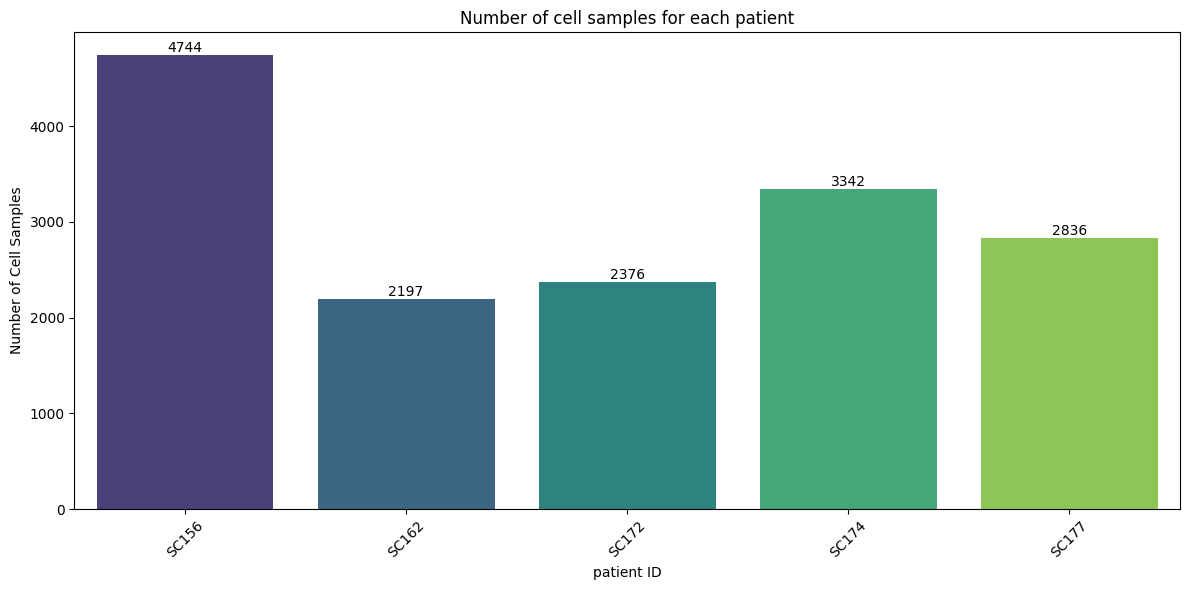

In [ ]:
# Plot the number of cell samples for each tumour sorted by tumourID
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=tumour_counts, x='tumourID', y='numCellSamples', palette='viridis', ax=ax)
plt.xlabel("patient ID")
plt.ylabel("Number of Cell Samples")
plt.title("Number of cell samples for each patient")

# Add text labels for the cell counts above the bars
for index, row in tumour_counts.iterrows():
    ax.text(index, row['numCellSamples'], row['numCellSamples'], color='black', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("patient_distribution.png")
plt.show()
# Save the plot to a PNG file
 # You can adjust the dpi (dots per inch) for resolution


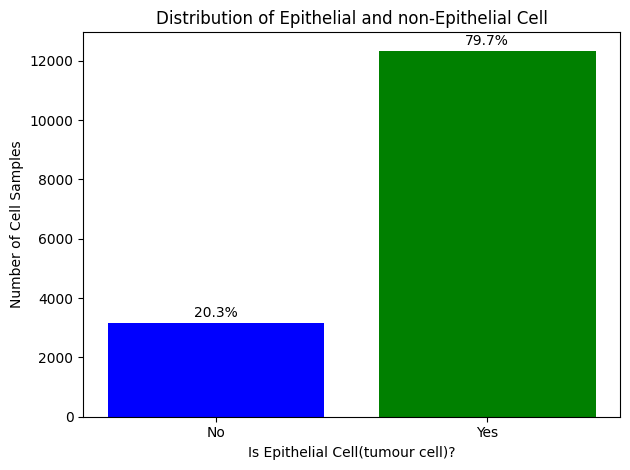

In [ ]:

# Plotting the bar chart
plt.bar(num_celltypebinary_counts1['is_Epithelial_cells'], num_celltypebinary_counts1['Count'], color=['blue', 'green'])
plt.xlabel('Is Epithelial Cell(tumour cell)?')
plt.ylabel('Number of Cell Samples')
plt.title('Distribution of Epithelial and non-Epithelial Cell')
bars = plt.bar(num_celltypebinary_counts1['is_Epithelial_cells'], num_celltypebinary_counts1['Count'], color=['blue', 'green'])

# Total count
total_count = num_celltypebinary_counts1['Count'].sum()
plt.xticks(num_celltypebinary_counts1['is_Epithelial_cells'], ['No', 'Yes'])  # Set custom x-ticks


# Add percentages above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100,
             f'{(height/total_count)*100:.1f}%',
             ha='center', va='bottom')

plt.savefig("celltype_distribution.png")
plt.tight_layout()
plt.show()



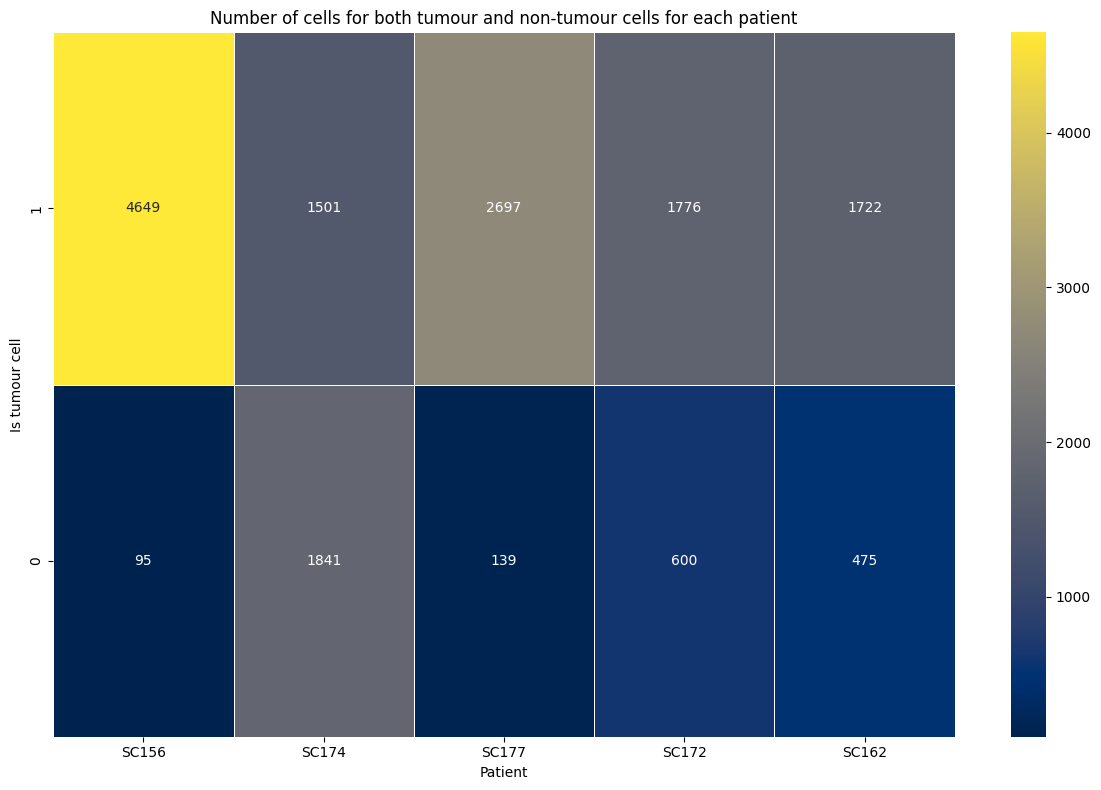

In [ ]:

# Count the number of cells in each CellType for each tumour
tumour_celltype_counts = selected_df.groupby(['tumourID', 'is_Epithelial_cells']).size().reset_index(name='CellCount')
tumour_order = tumour_celltype_counts.groupby('tumourID')['CellCount'].sum().sort_values(ascending=False).index
celltype_order = tumour_celltype_counts.groupby('is_Epithelial_cells')['CellCount'].sum().sort_values(ascending=False).index

heatmap_data = tumour_celltype_counts.pivot_table(index='is_Epithelial_cells', columns='tumourID', values='CellCount', fill_value=0)

# Reorder the pivot table according to the size of tumours and cell types
heatmap_data = heatmap_data.reindex(index=celltype_order, columns=tumour_order)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='cividis', annot=True, fmt='d', linewidths=0.5)
plt.xlabel("Patient")
plt.ylabel("Is tumour cell")
plt.title("Number of cells for both tumour and non-tumour cells for each patient")
plt.tight_layout()
plt.savefig("patient_tumour_dis.png")

plt.show()



In [ ]:
selected_df['is_Epithelial_cells'] = selected_df['CellType'].apply(lambda x: 1 if x == 'Epithelial cells' else 0)

counts = selected_df['is_Epithelial_cells'].value_counts()

print(counts)
display(selected_df)

1    12345
0     3150
Name: is_Epithelial_cells, dtype: int64


,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1,is_Epithelial_cells
907,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0
908,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
909,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
910,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547,1
911,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
21111,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
21112,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
21113,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1


In [ ]:
X = selected_df.drop(['reference','tumourID','CellType','is_Epithelial_cells'], axis=1)
y = selected_df['is_Epithelial_cells']
display(X)
display(y)

,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,RP11-206L10.9,FAM87B,LINC00115,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
907,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
908,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.501,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
909,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.455,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
910,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
911,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21111,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21112,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21113,0.0,0.0,0.505,0.505,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


907      0
908      1
909      1
910      1
911      1
        ..
21110    1
21111    1
21112    1
21113    1
21114    1
Name: is_Epithelial_cells, Length: 15495, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from collections import Counter

# Print the original class distribution
print('Original dataset shape %s' % Counter(y))

# Initialize the random over sampler
ros = RandomOverSampler(random_state=42)

# Fit and resample the data
X_res, y_res = ros.fit_resample(X, y)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 12345, 0: 3150})
Resampled dataset shape Counter({0: 12345, 1: 12345})


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,test_size=0.2, random_state=42)

# Scale the feature values to a similar range using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a SVM classifier and fit it to our training data
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = svc.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))


# Data Analysis

## Statistics Summary

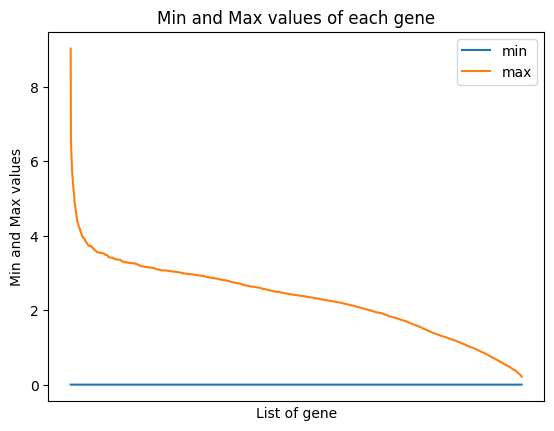

In [ ]:
only_gene_df = selected_df._get_numeric_data()

# Get the maximum values for each column
max_values = only_gene_df.max()
# Get the minimum values for each column
min_values = only_gene_df.min()


# Create a new DataFrame for easy plotting
plot_df = pd.DataFrame({
    'min': min_values,
    'max': max_values
})

# Sort DataFrame by 'max' column in descending order
plot_df = plot_df.sort_values('max', ascending=False)

# Create a line plot
plot_df.plot(kind='line')

# Set the y-axis label
plt.ylabel('Min and Max values')
plt.xlabel('List of gene')
plt.xticks([])

# Set the title
plt.title('Min and Max values of each gene')

# Display the plot
plt.show()


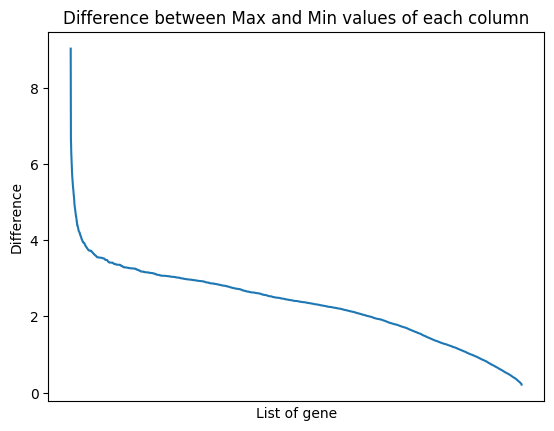

In [ ]:
# Calculate the difference between max and min values for each column
plot_df['diff'] = plot_df['max'] - plot_df['min']

# Sort DataFrame by 'diff' column in descending order
plot_df = plot_df.sort_values('diff', ascending=False)

# Create a line plot for the 'diff' column
plot_df['diff'].plot(kind='line')

# Set the y-axis label
plt.ylabel('Difference')
plt.xlabel('List of gene')
plt.xticks([])
plt.title('Difference between Max and Min values of each column')
plt.show()


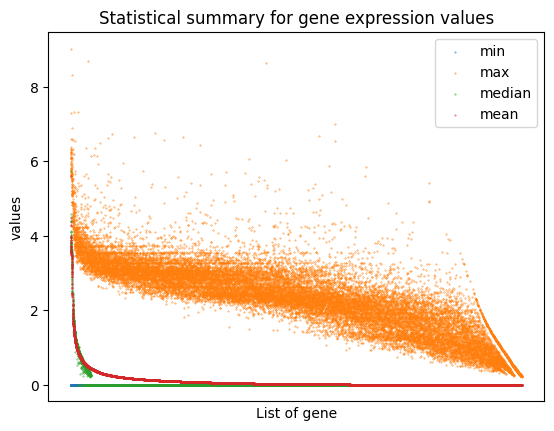

In [ ]:
only_gene_df = selected_df._get_numeric_data()

# Compute the min, max, median, and mean for each column
stats_df = pd.DataFrame({
    'min': only_gene_df.min(),
    'max': only_gene_df.max(),
    'median': only_gene_df.median(),
    'mean': only_gene_df.mean()
})

df_sorted = stats_df.sort_values('mean',ascending = False)
# Create a scatter plot for each row
fig, ax = plt.subplots()

for column in df_sorted.columns:
    ax.scatter(x=df_sorted.index, y=df_sorted[column], label=column, s=0.1)  # s parameter controls the size of the dots

plt.ylabel('values')
plt.xlabel('List of gene')
plt.xticks([])
plt.title('Statistical summary for gene expression values')
ax.legend()

plt.show()


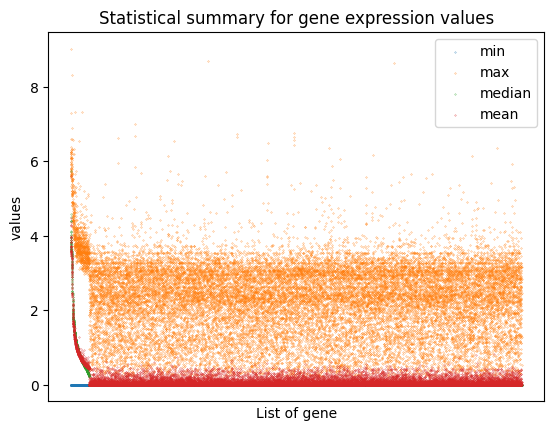

In [ ]:
only_gene_df = selected_df._get_numeric_data()

# Compute the min, max, median, and mean for each column
stats_df = pd.DataFrame({
    'min': only_gene_df.min(),
    'max': only_gene_df.max(),
    'median': only_gene_df.median(),
    'mean': only_gene_df.mean()
})

df_sorted = stats_df.sort_values('median',ascending = False)
# Create a scatter plot for each row
fig, ax = plt.subplots()

for column in df_sorted.columns:
    ax.scatter(x=df_sorted.index, y=df_sorted[column], label=column, s=0.05)  # s parameter controls the size of the dots

plt.ylabel('values')
plt.xlabel('List of gene')
plt.xticks([])
plt.title('Statistical summary for gene expression values')
ax.legend()

plt.show()

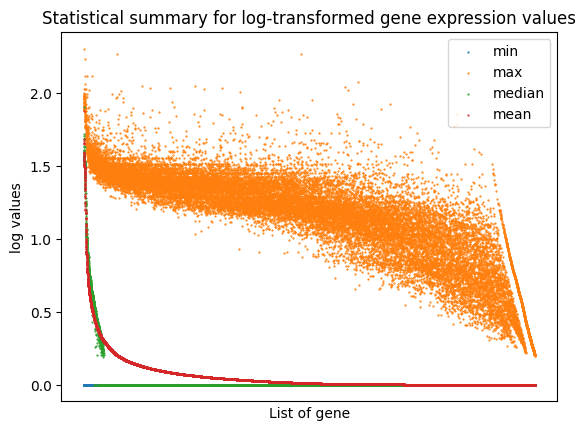

In [ ]:
import numpy as np

# Apply the log transformation to the whole DataFrame
log_df = np.log1p(only_gene_df)

# Compute the min, max, median, and mean for each column
log_stats_df = pd.DataFrame({
    'min': log_df.min(),
    'max': log_df.max(),
    'median': log_df.median(),
    'mean': log_df.mean()
})

df_sorted = log_stats_df.sort_values('mean',ascending = False)

# Create a scatter plot for each row
fig, ax = plt.subplots()

for column in df_sorted.columns:
    ax.scatter(x=df_sorted.index, y=df_sorted[column], label=column, s=0.3)  # s parameter controls the size of the dots

plt.ylabel('log values')
plt.xlabel('List of gene')
plt.xticks([])
plt.title('Statistical summary for log-transformed gene expression values')
ax.legend()

plt.show()


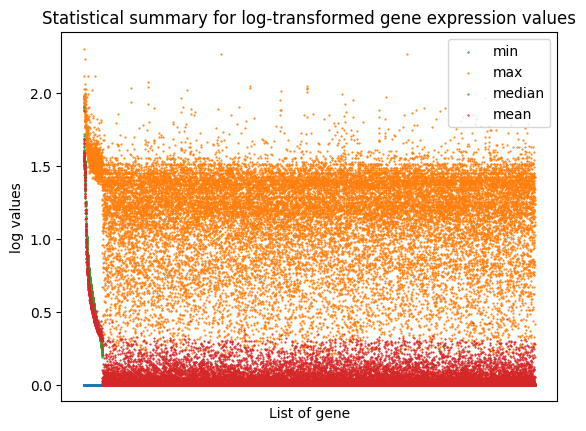

In [ ]:
import numpy as np
only_gene_df = selected_df._get_numeric_data()

# Apply the log transformation to the whole DataFrame
log_df = np.log1p(only_gene_df)

# Compute the min, max, median, and mean for each column
log_stats_df = pd.DataFrame({
    'min': log_df.min(),
    'max': log_df.max(),
    'median': log_df.median(),
    'mean': log_df.mean()
})

df_sorted = log_stats_df.sort_values('median',ascending = False)

# Create a scatter plot for each row
fig, ax = plt.subplots()

for column in df_sorted.columns:
    ax.scatter(x=df_sorted.index, y=df_sorted[column], label=column, s=0.3)  # s parameter controls the size of the dots

plt.ylabel('log values')
plt.xlabel('List of gene')
plt.xticks([])
plt.title('Statistical summary for log-transformed gene expression values')
ax.legend()

plt.show()

**we have zero-inflated issue**

# Data Processing

## Normalisation and Log Transformation

In [ ]:
df_numeric = selected_df.select_dtypes(include=np.number)

# normalisation
df_normalized = df_numeric.div(df_numeric.sum(axis=1), axis=0) *1e5

# apply log transformation
df_log_transformed = np.log1p(df_normalized)

# combine with non-numeric columns
df_non_numeric = selected_df.select_dtypes(exclude=np.number)
df_final = pd.concat([df_log_transformed, df_non_numeric], axis=1)
display(df_final)


,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,RP11-206L10.9,FAM87B,LINC00115,...,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1,reference,tumourID,CellType
907,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,CGTCAGGAGCCCAGCT-2,SC162,Macrophages
908,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,3.003298,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,AACGTTGCATCGGACC-2,SC162,Epithelial cells
909,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,2.907995,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,TTGAACGGTCTCAACA-2,SC162,Epithelial cells
910,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.077152,GGACGTCCAACACCTA-2,SC162,Epithelial cells
911,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,TACGGGCCATGCAACT-2,SC162,Epithelial cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells
21111,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells
21112,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells
21113,0.0,0.0,3.010011,3.010011,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells


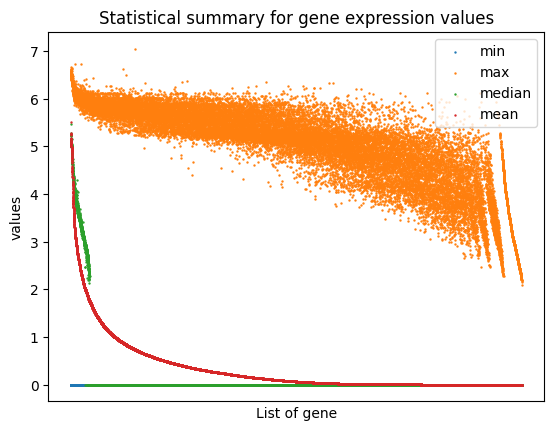

In [ ]:
dis = df_final._get_numeric_data()

# Compute the min, max, median, and mean for each column
stats_df = pd.DataFrame({
    'min': dis.min(),
    'max': dis.max(),
    'median': dis.median(),
    'mean': dis.mean()
})

df_sorted = stats_df.sort_values('mean',ascending = False)
# Create a scatter plot for each row
fig, ax = plt.subplots()

for column in df_sorted.columns:
    ax.scatter(x=df_sorted.index, y=df_sorted[column], label=column, s=0.5)  # s parameter controls the size of the dots

plt.ylabel('values')
plt.xlabel('List of gene')
plt.xticks([])
plt.title('Statistical summary for gene expression values')
ax.legend()

plt.show()

## Feature Selection And Dimension Reduction

In [ ]:
# feature selection by identifying top 1000 highly variable genes for each group


# Separate numerical and non-numerical columns
df_numeric = df_final.select_dtypes(include=np.number)
df_non_numeric = df_final.select_dtypes(exclude=np.number)


# Compute mean and variance for each gene
mean_expression = df_numeric.mean()
variance_expression = df_numeric.var()

# Compute the variance-to-mean ratio (VMR)
vmr = variance_expression / mean_expression

# Categorize genes into groups based on mean expression
bins = [0, 0.5, 1, 2, 3, 4, 5, 6]
groups = pd.cut(mean_expression, bins=bins)

# Create a DataFrame with VMR and groups
vmr_df = pd.DataFrame({'vmr': vmr, 'group': groups})

# For each group, select the top 1000 genes with the highest VMR
selected_genes = vmr_df.groupby('group')['vmr'].nlargest(1000)

print(selected_genes)

group                   
(0.0, 0.5]  RP11-21B23.2    5.926929
            CCR9            5.727148
            GRP             5.705720
            AC012370.3      5.675523
            WISP3           5.661705
                              ...   
(5.0, 6.0]  EEF1A1          0.019007
            RPL13A          0.015543
            RPL10           0.015074
            RPS18           0.014849
            RPLP1           0.013797
Name: vmr, Length: 3772, dtype: float64


In [ ]:
# For each group, select the top 1000 genes with the highest VMR
selected_genes_indices = selected_genes.index.get_level_values(1)
print(selected_genes_indices)


Index(['RP11-21B23.2', 'CCR9', 'GRP', 'AC012370.3', 'WISP3', 'AGXT', 'UCMA',
       'TMEM190', 'AC007325.1', 'TRAV21',
       ...
       'RPS27', 'RPL41', 'RPL13', 'RPS15', 'RPS6', 'EEF1A1', 'RPL13A', 'RPL10',
       'RPS18', 'RPLP1'],
      dtype='object', length=3772)


,RP11-21B23.2,CCR9,GRP,AC012370.3,WISP3,AGXT,UCMA,TMEM190,AC007325.1,TRAV21,...,RPS27,RPL41,RPL13,RPS15,RPS6,EEF1A1,RPL13A,RPL10,RPS18,RPLP1
907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.166061,5.470841,5.009105,5.254472,5.329650,5.064287,5.139073,5.222253,5.390963,5.314463
908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.089330,5.387897,4.640927,5.098242,5.104526,4.988544,4.907158,5.041072,5.232206,5.196029
909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.046954,5.375792,4.667608,5.142570,5.117345,4.967529,4.910000,5.009555,5.194360,5.141012
910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.105155,5.360392,4.551732,5.139221,5.089193,4.938202,4.844448,5.066314,5.171092,5.161593
911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.720826,5.017674,4.681907,4.764891,4.873015,5.025565,4.702082,4.849406,4.827084,4.814951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.864883,4.303983,4.961195,4.743139,4.508747,4.981090,4.914929,4.945159,4.880434,5.035401
21111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.874625,4.017559,4.704905,4.813056,4.588881,4.958595,4.953846,4.993108,4.887873,4.949075
21112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.554804,4.106038,5.056418,4.963111,4.841408,5.094072,5.153271,5.144709,5.063104,5.144709
21113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.688991,4.523193,4.903727,4.760481,4.780232,4.990521,4.949149,5.039940,5.001374,4.990521


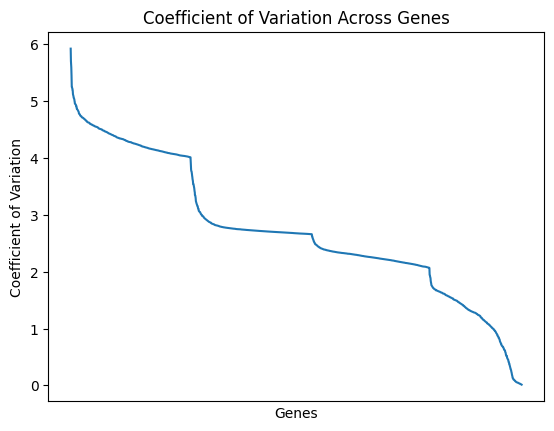

In [ ]:
coeff_of_var_sorted = vmr[selected_genes_indices].sort_values(ascending=False)
coeff_of_var_sorted
# Plotting
plt.plot(coeff_of_var_sorted.index, coeff_of_var_sorted.values)
plt.xlabel("Genes")
plt.ylabel("Coefficient of Variation")
plt.xticks([])
plt.title("Coefficient of Variation Across Genes")
plt.show()

In [ ]:
# Filter the original DataFrame to keep only the selected genes
selected_genes_df = df_numeric[selected_genes_indices]
display(selected_genes_df)
# Concatenate the numerical and non-numerical data
df_hvg = pd.concat([selected_genes_df, df_non_numeric], axis=1)
display(df_hvg)

,RP11-21B23.2,CCR9,GRP,AC012370.3,WISP3,AGXT,UCMA,TMEM190,AC007325.1,TRAV21,...,RPS27,RPL41,RPL13,RPS15,RPS6,EEF1A1,RPL13A,RPL10,RPS18,RPLP1
907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.166061,5.470841,5.009105,5.254472,5.329650,5.064287,5.139073,5.222253,5.390963,5.314463
908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.089330,5.387897,4.640927,5.098242,5.104526,4.988544,4.907158,5.041072,5.232206,5.196029
909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.046954,5.375792,4.667608,5.142570,5.117345,4.967529,4.910000,5.009555,5.194360,5.141012
910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.105155,5.360392,4.551732,5.139221,5.089193,4.938202,4.844448,5.066314,5.171092,5.161593
911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.720826,5.017674,4.681907,4.764891,4.873015,5.025565,4.702082,4.849406,4.827084,4.814951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.864883,4.303983,4.961195,4.743139,4.508747,4.981090,4.914929,4.945159,4.880434,5.035401
21111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.874625,4.017559,4.704905,4.813056,4.588881,4.958595,4.953846,4.993108,4.887873,4.949075
21112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.554804,4.106038,5.056418,4.963111,4.841408,5.094072,5.153271,5.144709,5.063104,5.144709
21113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.688991,4.523193,4.903727,4.760481,4.780232,4.990521,4.949149,5.039940,5.001374,4.990521


,RP11-21B23.2,CCR9,GRP,AC012370.3,WISP3,AGXT,UCMA,TMEM190,AC007325.1,TRAV21,...,RPS15,RPS6,EEF1A1,RPL13A,RPL10,RPS18,RPLP1,reference,tumourID,CellType
907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.254472,5.329650,5.064287,5.139073,5.222253,5.390963,5.314463,CGTCAGGAGCCCAGCT-2,SC162,Macrophages
908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.098242,5.104526,4.988544,4.907158,5.041072,5.232206,5.196029,AACGTTGCATCGGACC-2,SC162,Epithelial cells
909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.142570,5.117345,4.967529,4.910000,5.009555,5.194360,5.141012,TTGAACGGTCTCAACA-2,SC162,Epithelial cells
910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.139221,5.089193,4.938202,4.844448,5.066314,5.171092,5.161593,GGACGTCCAACACCTA-2,SC162,Epithelial cells
911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.764891,4.873015,5.025565,4.702082,4.849406,4.827084,4.814951,TACGGGCCATGCAACT-2,SC162,Epithelial cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.743139,4.508747,4.981090,4.914929,4.945159,4.880434,5.035401,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells
21111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.813056,4.588881,4.958595,4.953846,4.993108,4.887873,4.949075,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells
21112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.963111,4.841408,5.094072,5.153271,5.144709,5.063104,5.144709,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells
21113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.760481,4.780232,4.990521,4.949149,5.039940,5.001374,4.990521,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells


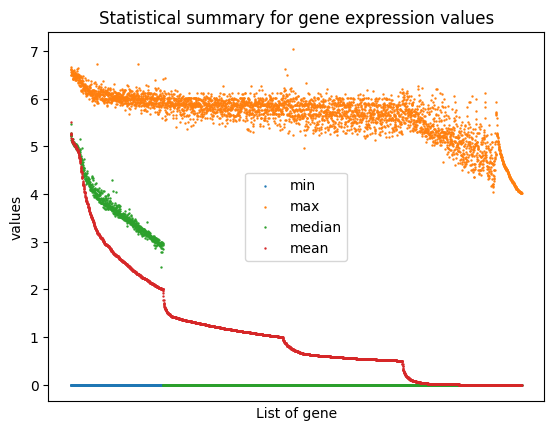

In [ ]:
dis = selected_genes_df
# Compute the min, max, median, and mean for each column
stats_df = pd.DataFrame({
    'min': dis.min(),
    'max': dis.max(),
    'median': dis.median(),
    'mean': dis.mean()
})

df_sorted = stats_df.sort_values('mean',ascending = False)
# Create a scatter plot for each row
fig, ax = plt.subplots()

for column in df_sorted.columns:
    ax.scatter(x=df_sorted.index, y=df_sorted[column], label=column, s=0.5)  # s parameter controls the size of the dots

plt.ylabel('values')
plt.xlabel('List of gene')
plt.xticks([])
plt.title('Statistical summary for gene expression values')
ax.legend()

plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA object
# Here we're reducing the dimensionality to 10, but you can specify any number that's less than the number of genes (columns) in your dataset
pca = PCA(n_components=500)

# Fit and transform the data to the PCA model
pca_result = pca.fit_transform(selected_genes_df)

# Convert the result back to a DataFrame
df_pca = pd.DataFrame(pca_result, columns=['PC'+str(i) for i in range(1, pca.n_components_+1)])

display(df_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
0,-17.810713,-5.522087,6.397757,15.115506,-12.201033,-2.490784,5.857567,-9.912138,-9.548699,3.061680,...,-2.161713,-0.881234,-0.642243,-1.166414,-0.407977,1.202809,0.911539,0.085002,-1.069667,-1.220452
1,-15.958105,-5.015321,5.585064,17.565767,-12.172820,-2.572541,6.899192,-11.303544,-10.172188,2.850372,...,-0.260286,-0.644800,-0.651593,-1.714215,-1.425216,-0.877330,-3.524937,-0.262268,0.504071,0.376076
2,-16.327815,-3.867700,3.986382,13.803317,-11.619680,2.194599,10.586081,-9.203554,-11.723880,1.362165,...,-0.665885,-1.138529,-0.001086,0.103682,-0.132759,-1.326946,0.346125,1.254993,-0.222388,-0.818159
3,-16.417996,-5.584667,4.292582,14.636611,-10.656352,2.389182,7.354907,-10.180090,-10.806970,2.887645,...,0.458275,-2.693971,0.337707,1.219915,-2.440825,1.229500,-0.775785,-0.847874,-1.136247,-0.151097
4,-33.108135,0.975959,2.012386,25.587088,-7.081766,-4.642559,-0.371142,-15.853416,0.091488,5.265226,...,1.732556,0.897033,-1.542106,-0.197973,-0.773864,-0.323824,-0.443276,-0.761145,0.303992,-1.312247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,5.107827,41.385469,6.716316,-4.458552,-9.122555,-8.056902,-12.114809,-4.351257,-5.467620,1.158518,...,1.638516,0.142630,1.729963,-2.839574,0.380826,1.901363,-1.969904,-2.133715,1.493619,4.194588
15491,0.281035,40.855334,5.785725,-5.382720,-9.717981,-6.871176,-14.024982,-4.913179,-5.157533,5.538068,...,1.075751,1.060079,0.405958,0.409502,-3.066566,-0.686756,0.207268,-0.571191,-1.954082,0.839312
15492,11.454509,38.154506,8.025895,-9.541090,-5.168718,-1.207036,-5.284472,-1.766867,-7.301296,-1.310167,...,0.492105,1.344480,2.381716,-0.932412,-0.597297,-0.159847,-0.565699,0.048429,0.893127,-2.832714
15493,1.289085,39.028542,8.417563,-6.728683,-8.618417,-1.079713,-10.309681,0.293113,-5.794436,10.305604,...,-2.410008,1.277845,0.715697,-0.850460,-2.269526,0.268590,-2.042555,0.558930,-1.710482,-1.111854


In [ ]:
df_non_numeric = df_non_numeric.reset_index(drop=True)
display(df_non_numeric)
# Concatenate the numerical and non-numerical data
df_hvg =  pd.concat([df_non_numeric, df_pca], axis=1)
display(df_hvg)

,reference,tumourID,CellType
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells
...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells


,reference,tumourID,CellType,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,-17.810713,-5.522087,6.397757,15.115506,-12.201033,-2.490784,5.857567,...,-2.161713,-0.881234,-0.642243,-1.166414,-0.407977,1.202809,0.911539,0.085002,-1.069667,-1.220452
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,-15.958105,-5.015321,5.585064,17.565767,-12.172820,-2.572541,6.899192,...,-0.260286,-0.644800,-0.651593,-1.714215,-1.425216,-0.877330,-3.524937,-0.262268,0.504071,0.376076
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,-16.327815,-3.867700,3.986382,13.803317,-11.619680,2.194599,10.586081,...,-0.665885,-1.138529,-0.001086,0.103682,-0.132759,-1.326946,0.346125,1.254993,-0.222388,-0.818159
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,-16.417996,-5.584667,4.292582,14.636611,-10.656352,2.389182,7.354907,...,0.458275,-2.693971,0.337707,1.219915,-2.440825,1.229500,-0.775785,-0.847874,-1.136247,-0.151097
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,-33.108135,0.975959,2.012386,25.587088,-7.081766,-4.642559,-0.371142,...,1.732556,0.897033,-1.542106,-0.197973,-0.773864,-0.323824,-0.443276,-0.761145,0.303992,-1.312247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,5.107827,41.385469,6.716316,-4.458552,-9.122555,-8.056902,-12.114809,...,1.638516,0.142630,1.729963,-2.839574,0.380826,1.901363,-1.969904,-2.133715,1.493619,4.194588
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.281035,40.855334,5.785725,-5.382720,-9.717981,-6.871176,-14.024982,...,1.075751,1.060079,0.405958,0.409502,-3.066566,-0.686756,0.207268,-0.571191,-1.954082,0.839312
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,11.454509,38.154506,8.025895,-9.541090,-5.168718,-1.207036,-5.284472,...,0.492105,1.344480,2.381716,-0.932412,-0.597297,-0.159847,-0.565699,0.048429,0.893127,-2.832714
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,1.289085,39.028542,8.417563,-6.728683,-8.618417,-1.079713,-10.309681,...,-2.410008,1.277845,0.715697,-0.850460,-2.269526,0.268590,-2.042555,0.558930,-1.710482,-1.111854


In [ ]:
df_hvg.to_csv('/content/drive/MyDrive/filtered_gene.csv', index=False)


after gene selection and dimension reduction, we have 500 feature gene



In [ ]:
import pandas as pd

df_hvg = pd.read_csv('/content/drive/MyDrive/filtered_gene.csv')
display(df_hvg)

,reference,tumourID,CellType,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,-17.810713,-5.522087,6.397757,15.115506,-12.201033,-2.490784,5.857567,...,-2.161713,-0.881234,-0.642243,-1.166414,-0.407977,1.202809,0.911539,0.085002,-1.069667,-1.220452
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,-15.958105,-5.015321,5.585064,17.565767,-12.172820,-2.572541,6.899192,...,-0.260286,-0.644800,-0.651593,-1.714215,-1.425216,-0.877330,-3.524937,-0.262268,0.504071,0.376076
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,-16.327815,-3.867700,3.986382,13.803317,-11.619680,2.194599,10.586081,...,-0.665885,-1.138529,-0.001086,0.103682,-0.132759,-1.326946,0.346125,1.254993,-0.222388,-0.818159
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,-16.417996,-5.584667,4.292582,14.636611,-10.656352,2.389182,7.354907,...,0.458275,-2.693971,0.337707,1.219915,-2.440825,1.229500,-0.775785,-0.847874,-1.136247,-0.151097
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,-33.108135,0.975959,2.012386,25.587088,-7.081766,-4.642559,-0.371142,...,1.732556,0.897033,-1.542106,-0.197973,-0.773864,-0.323824,-0.443276,-0.761145,0.303992,-1.312247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,5.107827,41.385469,6.716316,-4.458552,-9.122555,-8.056902,-12.114809,...,1.638516,0.142630,1.729963,-2.839574,0.380826,1.901363,-1.969904,-2.133715,1.493619,4.194588
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.281035,40.855334,5.785725,-5.382720,-9.717981,-6.871176,-14.024982,...,1.075751,1.060079,0.405958,0.409502,-3.066566,-0.686756,0.207268,-0.571191,-1.954082,0.839312
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,11.454509,38.154506,8.025895,-9.541090,-5.168718,-1.207036,-5.284472,...,0.492105,1.344480,2.381716,-0.932412,-0.597297,-0.159847,-0.565699,0.048429,0.893127,-2.832714
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,1.289085,39.028542,8.417563,-6.728683,-8.618417,-1.079713,-10.309681,...,-2.410008,1.277845,0.715697,-0.850460,-2.269526,0.268590,-2.042555,0.558930,-1.710482,-1.111854


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import PLSRegression

# Q1: can we predict tumour type based on single cell gene expression data?


In [ ]:
display(df_hvg)

,reference,tumourID,CellType,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,-17.810713,-5.522087,6.397757,15.115506,-12.201033,-2.490784,5.857567,...,-2.161713,-0.881234,-0.642243,-1.166414,-0.407977,1.202809,0.911539,0.085002,-1.069667,-1.220452
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,-15.958105,-5.015321,5.585064,17.565767,-12.172820,-2.572541,6.899192,...,-0.260286,-0.644800,-0.651593,-1.714215,-1.425216,-0.877330,-3.524937,-0.262268,0.504071,0.376076
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,-16.327815,-3.867700,3.986382,13.803317,-11.619680,2.194599,10.586081,...,-0.665885,-1.138529,-0.001086,0.103682,-0.132759,-1.326946,0.346125,1.254993,-0.222388,-0.818159
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,-16.417996,-5.584667,4.292582,14.636611,-10.656352,2.389182,7.354907,...,0.458275,-2.693971,0.337707,1.219915,-2.440825,1.229500,-0.775785,-0.847874,-1.136247,-0.151097
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,-33.108135,0.975959,2.012386,25.587088,-7.081766,-4.642559,-0.371142,...,1.732556,0.897033,-1.542106,-0.197973,-0.773864,-0.323824,-0.443276,-0.761145,0.303992,-1.312247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,5.107827,41.385469,6.716316,-4.458552,-9.122555,-8.056902,-12.114809,...,1.638516,0.142630,1.729963,-2.839574,0.380826,1.901363,-1.969904,-2.133715,1.493619,4.194588
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.281035,40.855334,5.785725,-5.382720,-9.717981,-6.871176,-14.024982,...,1.075751,1.060079,0.405958,0.409502,-3.066566,-0.686756,0.207268,-0.571191,-1.954082,0.839312
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,11.454509,38.154506,8.025895,-9.541090,-5.168718,-1.207036,-5.284472,...,0.492105,1.344480,2.381716,-0.932412,-0.597297,-0.159847,-0.565699,0.048429,0.893127,-2.832714
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,1.289085,39.028542,8.417563,-6.728683,-8.618417,-1.079713,-10.309681,...,-2.410008,1.277845,0.715697,-0.850460,-2.269526,0.268590,-2.042555,0.558930,-1.710482,-1.111854


In [ ]:
X = df_hvg.drop(['reference','tumourID','CellType'], axis=1)
y = df_hvg['tumourID']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Support Vector Machine (LinearSVC is more scalable than SVC with linear kernel)
model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)


Linear SVM Accuracy: 0.9880606647305582
              precision    recall  f1-score   support

       SC162       0.99      1.00      1.00       917
       SC174       0.98      1.00      0.99       429
       SC172       0.99      0.97      0.98       487
       SC177       0.98      0.98      0.98       681
       SC156       1.00      0.99      1.00       585

    accuracy                           0.99      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       0.99      0.99      0.99      3099



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

Random Forest Accuracy: 0.9599870926105195
              precision    recall  f1-score   support

       SC162       1.00      0.99      0.99       917
       SC174       0.98      0.97      0.98       429
       SC172       0.98      0.85      0.91       487
       SC177       0.86      0.98      0.92       681
       SC156       1.00      0.98      0.99       585

    accuracy                           0.96      3099
   macro avg       0.96      0.95      0.96      3099
weighted avg       0.96      0.96      0.96      3099



In [ ]:

# K-Nearest Neighbors
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('K-Nearest Neighbors Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

K-Nearest Neighbors Accuracy: 0.9674088415617941
              precision    recall  f1-score   support

       SC162       1.00      0.99      1.00       917
       SC174       0.98      0.97      0.98       429
       SC172       0.90      0.92      0.91       487
       SC177       0.94      0.95      0.94       681
       SC156       0.99      0.99      0.99       585

    accuracy                           0.97      3099
   macro avg       0.96      0.96      0.96      3099
weighted avg       0.97      0.97      0.97      3099



In [ ]:

# XGBoost
from sklearn.preprocessing import LabelEncoder
# Encode the string labels as integers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

XGBoost Accuracy: 0.9870926105195225
              precision    recall  f1-score   support

       SC162       1.00      1.00      1.00       917
       SC174       1.00      0.99      0.99       429
       SC172       0.97      0.97      0.97       487
       SC177       0.97      0.99      0.98       681
       SC156       0.99      0.99      0.99       585

    accuracy                           0.99      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       0.99      0.99      0.99      3099



In [ ]:

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

Logistic Regression Accuracy: 0.9916101968376896
              precision    recall  f1-score   support

       SC162       1.00      1.00      1.00       917
       SC174       1.00      1.00      1.00       429
       SC172       0.97      0.98      0.98       487
       SC177       0.99      0.98      0.98       681
       SC156       1.00      0.99      1.00       585

    accuracy                           0.99      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       0.99      0.99      0.99      3099



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Q2: will adding the feature "cellType" affect model(on predicting tumor) performance?

In [ ]:
# one-hot encoding
df_encoded = pd.get_dummies(df_hvg, columns=["CellType"])
display(df_encoded)

,reference,tumourID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,CellType_CD8+ T-cells,CellType_DC,CellType_Endothelial cells,CellType_Epithelial cells,CellType_Fibroblasts,CellType_HSC,CellType_Macrophages,CellType_Monocytes,CellType_NK cells,CellType_Others
0,CGTCAGGAGCCCAGCT-2,SC162,-17.810713,-5.522087,6.397757,15.115506,-12.201033,-2.490784,5.857567,-9.912138,...,0,0,0,0,0,0,1,0,0,0
1,AACGTTGCATCGGACC-2,SC162,-15.958105,-5.015321,5.585064,17.565767,-12.172820,-2.572541,6.899192,-11.303544,...,0,0,0,1,0,0,0,0,0,0
2,TTGAACGGTCTCAACA-2,SC162,-16.327815,-3.867700,3.986382,13.803317,-11.619680,2.194599,10.586081,-9.203554,...,0,0,0,1,0,0,0,0,0,0
3,GGACGTCCAACACCTA-2,SC162,-16.417996,-5.584667,4.292582,14.636611,-10.656352,2.389182,7.354907,-10.180090,...,0,0,0,1,0,0,0,0,0,0
4,TACGGGCCATGCAACT-2,SC162,-33.108135,0.975959,2.012386,25.587088,-7.081766,-4.642559,-0.371142,-15.853416,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,5.107827,41.385469,6.716316,-4.458552,-9.122555,-8.056902,-12.114809,-4.351257,...,0,0,0,1,0,0,0,0,0,0
15491,CAAGAAAAGCCGTCGT-12,SC156,0.281035,40.855334,5.785725,-5.382720,-9.717981,-6.871176,-14.024982,-4.913179,...,0,0,0,1,0,0,0,0,0,0
15492,AGCTTGAAGTGCGTGA-12,SC156,11.454509,38.154506,8.025895,-9.541090,-5.168718,-1.207036,-5.284472,-1.766867,...,0,0,0,1,0,0,0,0,0,0
15493,AACTCAGTCTTTAGGG-12,SC156,1.289085,39.028542,8.417563,-6.728683,-8.618417,-1.079713,-10.309681,0.293113,...,0,0,0,1,0,0,0,0,0,0


In [ ]:

X = df_hvg.drop(['reference','tumourID'], axis=1)
y = df_hvg['tumourID']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Support Vector Machine (LinearSVC is more scalable than SVC with linear kernel)
model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

ValueError: ignored

In [ ]:
X = df_encoded.drop(['reference','tumourID'], axis=1)
y = df_encoded['tumourID']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Support Vector Machine (LinearSVC is more scalable than SVC with linear kernel)
model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

Linear SVM Accuracy: 0.989351403678606
              precision    recall  f1-score   support

       SC162       1.00      1.00      1.00       917
       SC174       0.99      1.00      0.99       429
       SC172       0.98      0.97      0.98       487
       SC177       0.98      0.98      0.98       681
       SC156       0.99      0.99      0.99       585

    accuracy                           0.99      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       0.99      0.99      0.99      3099



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

Random Forest Accuracy: 0.9657954178767344
              precision    recall  f1-score   support

       SC162       1.00      0.99      0.99       917
       SC174       0.99      0.97      0.98       429
       SC172       0.97      0.87      0.92       487
       SC177       0.89      0.98      0.93       681
       SC156       1.00      0.98      0.99       585

    accuracy                           0.97      3099
   macro avg       0.97      0.96      0.96      3099
weighted avg       0.97      0.97      0.97      3099



In [ ]:

# K-Nearest Neighbors
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('K-Nearest Neighbors Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

K-Nearest Neighbors Accuracy: 0.9674088415617941
              precision    recall  f1-score   support

       SC162       1.00      0.99      1.00       917
       SC174       0.98      0.97      0.98       429
       SC172       0.90      0.92      0.91       487
       SC177       0.94      0.95      0.94       681
       SC156       0.99      0.99      0.99       585

    accuracy                           0.97      3099
   macro avg       0.96      0.96      0.96      3099
weighted avg       0.97      0.97      0.97      3099



In [ ]:

# XGBoost
from sklearn.preprocessing import LabelEncoder
# Encode the string labels as integers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

XGBoost Accuracy: 0.9877379799935463
              precision    recall  f1-score   support

       SC162       1.00      1.00      1.00       917
       SC174       1.00      0.99      0.99       429
       SC172       0.98      0.96      0.97       487
       SC177       0.96      0.99      0.98       681
       SC156       1.00      0.99      0.99       585

    accuracy                           0.99      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       0.99      0.99      0.99      3099



In [ ]:

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

Logistic Regression Accuracy: 0.9919328815747015
              precision    recall  f1-score   support

       SC162       1.00      1.00      1.00       917
       SC174       1.00      1.00      1.00       429
       SC172       0.98      0.98      0.98       487
       SC177       0.99      0.98      0.99       681
       SC156       1.00      0.99      1.00       585

    accuracy                           0.99      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       0.99      0.99      0.99      3099



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Q3: which cell type have significant impact onthe prediction??

##Epithelial cells

In [ ]:
# Assume df is your DataFrame and "celltype" is the column you're interested inselected_rows

selected_rows = df_hvg[df_hvg['CellType'] == 'Epithelial cells']
display(selected_rows)
X = selected_rows.drop(['reference','tumourID','CellType'], axis=1)
y = selected_rows['tumourID']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Support Vector Machine (LinearSVC is more scalable than SVC with linear kernel)
model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)


,reference,tumourID,CellType,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,-15.958105,-5.015321,5.585064,17.565767,-12.172820,-2.572541,6.899192,...,-0.260286,-0.644800,-0.651593,-1.714215,-1.425216,-0.877330,-3.524937,-0.262268,0.504071,0.376076
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,-16.327815,-3.867700,3.986382,13.803317,-11.619680,2.194599,10.586081,...,-0.665885,-1.138529,-0.001086,0.103682,-0.132759,-1.326946,0.346125,1.254993,-0.222388,-0.818159
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,-16.417996,-5.584667,4.292582,14.636611,-10.656352,2.389182,7.354907,...,0.458275,-2.693971,0.337707,1.219915,-2.440825,1.229500,-0.775785,-0.847874,-1.136247,-0.151097
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,-33.108135,0.975959,2.012386,25.587088,-7.081766,-4.642559,-0.371142,...,1.732556,0.897033,-1.542106,-0.197973,-0.773864,-0.323824,-0.443276,-0.761145,0.303992,-1.312247
5,AGTCTTTGTGACTCAT-2,SC162,Epithelial cells,16.323454,-13.701543,-8.201203,17.147440,-5.369710,6.938554,-4.401577,...,-0.767275,-2.800427,-0.999662,0.258711,0.032030,1.695119,-2.581130,0.519890,3.735152,-0.512585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,5.107827,41.385469,6.716316,-4.458552,-9.122555,-8.056902,-12.114809,...,1.638516,0.142630,1.729963,-2.839574,0.380826,1.901363,-1.969904,-2.133715,1.493619,4.194588
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.281035,40.855334,5.785725,-5.382720,-9.717981,-6.871176,-14.024982,...,1.075751,1.060079,0.405958,0.409502,-3.066566,-0.686756,0.207268,-0.571191,-1.954082,0.839312
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,11.454509,38.154506,8.025895,-9.541090,-5.168718,-1.207036,-5.284472,...,0.492105,1.344480,2.381716,-0.932412,-0.597297,-0.159847,-0.565699,0.048429,0.893127,-2.832714
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,1.289085,39.028542,8.417563,-6.728683,-8.618417,-1.079713,-10.309681,...,-2.410008,1.277845,0.715697,-0.850460,-2.269526,0.268590,-2.042555,0.558930,-1.710482,-1.111854


Linear SVM Accuracy: 0.987444309437019
              precision    recall  f1-score   support

       SC162       1.00      0.99      1.00       906
       SC174       0.99      1.00      0.99       362
       SC172       0.97      0.98      0.97       348
       SC177       0.95      0.95      0.95       308
       SC156       1.00      0.99      1.00       545

    accuracy                           0.99      2469
   macro avg       0.98      0.98      0.98      2469
weighted avg       0.99      0.99      0.99      2469



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# 4. Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

Random Forest Accuracy: 0.9688132847306602
              precision    recall  f1-score   support

       SC162       1.00      0.99      0.99       906
       SC174       0.98      0.99      0.98       362
       SC172       0.94      0.92      0.93       348
       SC177       0.87      0.93      0.90       308
       SC156       1.00      0.98      0.99       545

    accuracy                           0.97      2469
   macro avg       0.96      0.96      0.96      2469
weighted avg       0.97      0.97      0.97      2469



## Endothelial cells

In [ ]:
# Assume df is your DataFrame and "celltype" is the column you're interested in
selected_rows = df_hvg[df_hvg['CellType'] == 'Endothelial cells']
display(selected_rows)
X = selected_rows.drop(['reference','tumourID','CellType'], axis=1)
y = selected_rows['tumourID']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Support Vector Machine (LinearSVC is more scalable than SVC with linear kernel)
model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

,reference,tumourID,CellType,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
104,ACGCCGAGTAGGAGTC-2,SC162,Endothelial cells,38.389406,-17.802489,-9.607421,16.780443,-2.988754,4.770375,-9.097481,...,0.673734,-1.677971,-0.241067,1.302964,-2.258206,-2.475712,0.237441,3.456467,-0.666337,-0.165317
241,CACACCTCAGCCAATT-2,SC162,Endothelial cells,47.162885,-16.082832,-11.539129,9.296790,-0.338514,5.313048,-1.291577,...,0.779821,-0.183761,0.391567,-1.752558,1.679070,-0.941884,-0.165540,0.765191,-0.480859,-1.546598
252,ACAGCTAGTCCGAGTC-2,SC162,Endothelial cells,40.675715,-18.507583,-7.252736,8.443605,-1.350145,7.509487,0.217526,...,0.169829,-0.745178,1.759119,-1.069440,-0.500878,0.286341,-1.045057,0.978600,0.906997,1.589528
262,GATCAGTCAAGGACTG-2,SC162,Endothelial cells,45.348485,-13.654793,-8.904044,13.274536,-0.503027,4.770979,-0.867774,...,1.943568,1.298715,2.557396,-0.916057,0.536438,0.531017,1.066315,1.241739,-0.849687,-0.518517
532,AGAGTGGCAGATCTGT-2,SC162,Endothelial cells,29.279207,-17.396818,-9.337699,14.576730,-2.996035,3.082344,-9.237985,...,-2.355889,-0.697665,-1.351562,0.584022,-1.731009,-1.274401,0.883844,0.809855,0.099721,1.267941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,CGAGAAGTCCGTACAA-12,SC156,Endothelial cells,-40.157052,2.924426,-11.687447,-5.383529,-0.657499,8.318971,3.635044,...,0.156330,-0.510702,1.496449,-1.075047,-1.163721,0.064230,-0.007232,-1.394683,1.534015,0.170762
15272,AGTGAGGGTCGCGAAA-12,SC156,Endothelial cells,-6.420391,1.847737,-20.053614,-7.101940,8.491813,1.644291,-0.236291,...,1.307803,-0.538452,-1.826616,-0.003159,-0.960691,-1.701973,-2.597581,-3.071002,3.067119,0.402622
15366,TCACGAAGTTCGCGAC-12,SC156,Endothelial cells,-26.910600,2.532349,-8.646725,-3.544278,4.006969,2.802362,1.292872,...,-0.589834,-0.315103,-0.303557,-1.104969,1.591068,0.860124,0.772096,-1.459847,-0.881023,2.934944
15453,CTTAGGAGTGCTTCTC-12,SC156,Endothelial cells,20.335677,21.203473,6.592360,-10.801230,1.893777,-7.091479,26.776809,...,0.442668,1.249114,-2.386582,-1.022728,-2.923258,0.381849,-1.011154,1.426165,0.350288,-0.941558


Linear SVM Accuracy: 0.9757281553398058
              precision    recall  f1-score   support

       SC162       1.00      0.83      0.91         6
       SC174       1.00      1.00      1.00         3
       SC172       1.00      0.91      0.95        46
       SC177       0.97      1.00      0.98       150
       SC156       1.00      1.00      1.00         1

    accuracy                           0.98       206
   macro avg       0.99      0.95      0.97       206
weighted avg       0.98      0.98      0.98       206



In [ ]:
# 4. Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

Random Forest Accuracy: 0.8980582524271845
              precision    recall  f1-score   support

       SC162       0.00      0.00      0.00         6
       SC174       0.00      0.00      0.00         3
       SC172       1.00      0.76      0.86        46
       SC177       0.88      1.00      0.93       150
       SC156       0.00      0.00      0.00         1

    accuracy                           0.90       206
   macro avg       0.38      0.35      0.36       206
weighted avg       0.86      0.90      0.87       206



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Fibroblasts

In [ ]:
# Assume df is your DataFrame and "celltype" is the column you're interested in
selected_rows = df_hvg[df_hvg['CellType'] == 'Fibroblasts']
display(selected_rows)

X = selected_rows.drop(['reference','tumourID','CellType'], axis=1)
y = selected_rows['tumourID']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Support Vector Machine (LinearSVC is more scalable than SVC with linear kernel)
model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

,reference,tumourID,CellType,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
913,GGGAGATCAGGTCTCG-2,SC162,Fibroblasts,-21.108320,-5.379652,-0.038598,14.494823,-7.766145,-6.101035,4.424854,...,-2.860989,-1.366444,0.659576,0.021222,-0.674721,0.434030,0.021350,-1.416103,0.771039,-1.220441
979,GGGAGATCACGAAACG-2,SC162,Fibroblasts,47.569114,-0.794256,-2.739422,3.889167,2.335215,-3.107736,12.352323,...,3.335156,0.006107,2.550134,-0.211645,-1.324844,1.392587,0.149466,-2.391613,0.248150,-0.680484
1825,AGAGCTTGTATCAGTC-2,SC162,Fibroblasts,43.198491,-4.032698,-4.314349,5.624126,0.004480,-4.677316,15.637312,...,0.392902,-0.115005,-1.942859,-1.057264,-0.106503,1.370033,-1.677418,1.417450,0.708858,1.578141
2201,GTGCGGTTCAGTTTGG-3,SC174,Fibroblasts,55.159707,-12.097441,-9.846039,3.299240,5.052182,4.263898,-5.017865,...,0.708591,2.187212,-0.076619,3.071829,1.382834,-1.692569,0.243438,1.656695,-1.043976,1.267112
2204,CGACTTCTCCACTCCA-3,SC174,Fibroblasts,43.025409,-8.361407,-9.163757,9.953230,3.191694,0.165410,-6.920464,...,1.840676,-1.102130,0.929931,-1.341050,-3.217217,-0.188539,1.501002,0.605114,-1.168914,1.540090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12713,ACGGGCTAGCAATATG-12,SC156,Fibroblasts,-26.528949,4.219452,-11.013290,-9.126235,3.154579,4.808548,0.345067,...,3.289675,2.086910,-0.668769,4.219767,3.086389,0.005956,-2.047257,-0.029434,1.875609,1.068768
13123,GATGCTAGTTAGAACA-12,SC156,Fibroblasts,-26.859593,-2.060305,-14.187973,-10.300426,0.943741,9.916226,3.268850,...,2.746719,2.088939,2.594699,-0.777116,-1.012024,-0.076147,-1.283320,0.698541,-0.240695,0.881244
13357,ACGATGTTCATCTGTT-12,SC156,Fibroblasts,-11.926605,0.760954,-18.744709,-10.311005,7.397170,-2.504190,-3.299256,...,-1.845709,-2.054208,-1.168804,4.719080,0.970279,-1.557956,-1.816574,2.794078,-0.357518,2.229679
14152,TGCTGCTAGGCTAGCA-12,SC156,Fibroblasts,-11.467745,-2.948716,-19.419898,-8.393953,2.406871,-1.978539,-2.096484,...,1.380300,-0.725545,-1.471723,-0.843081,0.574477,1.656789,1.773650,0.487476,-0.262369,1.993367


Linear SVM Accuracy: 0.9137931034482759
              precision    recall  f1-score   support

       SC162       1.00      1.00      1.00         2
       SC174       0.00      0.00      0.00         1
       SC172       0.81      0.77      0.79        22
       SC156       0.94      0.96      0.95        91

    accuracy                           0.91       116
   macro avg       0.69      0.68      0.68       116
weighted avg       0.90      0.91      0.91       116



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#  Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

Random Forest Accuracy: 0.853448275862069
              precision    recall  f1-score   support

       SC162       0.00      0.00      0.00         2
       SC174       0.00      0.00      0.00         1
       SC172       1.00      0.36      0.53        22
       SC156       0.84      1.00      0.91        91

    accuracy                           0.85       116
   macro avg       0.46      0.34      0.36       116
weighted avg       0.85      0.85      0.82       116



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Macrophages

In [ ]:
# Assume df is your DataFrame and "celltype" is the column you're interested in
selected_rows = df_hvg[df_hvg['CellType'] == 'Macrophages']
display(selected_rows)
X = selected_rows.drop(['reference','tumourID','CellType'], axis=1)
y = selected_rows['tumourID']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Support Vector Machine (LinearSVC is more scalable than SVC with linear kernel)
model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

,reference,tumourID,CellType,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,-17.810713,-5.522087,6.397757,15.115506,-12.201033,-2.490784,5.857567,...,-2.161713,-0.881234,-0.642243,-1.166414,-0.407977,1.202809,0.911539,0.085002,-1.069667,-1.220452
28,TGAGAGGGTAATCGTC-2,SC162,Macrophages,10.900321,-12.286746,-3.809032,20.193525,-7.980144,-1.386107,-2.952399,...,0.522723,0.254730,0.091995,-2.070996,-2.821797,0.345185,0.305963,-2.640706,-0.573383,-0.257766
38,TCACAAGAGTAGCGGT-2,SC162,Macrophages,31.854024,-19.207313,-7.739204,19.748304,-6.187316,2.887653,-7.454789,...,-1.894947,0.907810,-2.621770,1.792519,-1.781682,-0.539298,-1.963841,-0.934162,-0.122793,1.285277
85,GTAACGTAGTTAACGA-2,SC162,Macrophages,40.427375,-19.546091,-11.830258,15.560800,-4.175352,2.944778,-7.741164,...,-2.022380,0.501719,-1.215060,-0.704512,1.280055,0.623085,0.595477,0.542757,0.506669,-0.031578
88,AGCTCTCGTGATGCCC-2,SC162,Macrophages,46.629669,-17.871336,-9.387487,12.675967,-3.146569,3.530772,-7.013600,...,1.383220,-3.539841,-1.677515,-2.882005,-1.792991,0.172278,0.419526,-2.786091,-1.150169,-2.286662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14830,GTGCATAAGAGCCCAA-12,SC156,Macrophages,-22.017819,3.826213,-20.931264,-6.466099,6.974543,-5.054639,-0.717080,...,-0.851722,-0.703907,0.187766,-0.782426,-0.611533,1.046538,1.356461,-0.545313,3.009084,2.741869
14862,CTCGAAATCAGGCGAA-12,SC156,Macrophages,-24.898315,-4.102433,-9.549922,-12.861306,0.097885,12.501524,2.185029,...,0.302819,3.236040,0.275497,3.961500,-0.150396,-0.222686,-1.712428,-0.080373,-0.000028,1.492883
14972,TCTCATACATCGGTTA-12,SC156,Macrophages,-21.361052,-1.142164,-15.908432,-7.741095,1.681613,2.817976,0.937331,...,4.824182,2.838811,1.909595,0.272973,0.709249,3.240671,-0.114905,0.997637,-0.020729,-2.494498
15004,ACTATCTGTACTTGAC-12,SC156,Macrophages,-22.015878,1.871652,-18.854653,-2.870158,4.296505,0.374751,-2.681419,...,-0.510264,2.601811,2.280870,1.434487,1.475643,-1.643619,0.256587,-2.508947,2.460775,-1.139655


Linear SVM Accuracy: 0.9733333333333334
              precision    recall  f1-score   support

       SC162       1.00      1.00      1.00         4
       SC174       1.00      1.00      1.00        31
       SC172       1.00      0.91      0.95        11
       SC177       0.89      1.00      0.94        16
       SC156       1.00      0.92      0.96        13

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



In [ ]:
#  Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

Random Forest Accuracy: 0.88
              precision    recall  f1-score   support

       SC162       1.00      0.50      0.67         4
       SC174       0.94      0.97      0.95        31
       SC172       1.00      0.73      0.84        11
       SC177       0.71      0.94      0.81        16
       SC156       0.92      0.85      0.88        13

    accuracy                           0.88        75
   macro avg       0.91      0.80      0.83        75
weighted avg       0.90      0.88      0.88        75



B-cells	280
1	CD4+ T-cells	258
2	CD8+ T-cells	548
3	DC	26
4	Endothelial cells	1651
5	Epithelial cells	15425
6	Fibroblasts	868
7	HSC	341
8	Macrophages	708
9	Monocytes	548
10	NK cells	132
11	Other

In [ ]:
#  Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

Random Forest Accuracy: 0.38461538461538464
              precision    recall  f1-score   support

       SC162       0.00      0.00      0.00         1
       SC174       0.00      0.00      0.00         2
       SC172       0.38      1.00      0.56         5
       SC177       0.00      0.00      0.00         4
       SC156       0.00      0.00      0.00         1

    accuracy                           0.38        13
   macro avg       0.08      0.20      0.11        13
weighted avg       0.15      0.38      0.21        13



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Q4: can we predict cell type?

In [ ]:
df_hvg

,reference,tumourID,CellType,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,-17.810713,-5.522087,6.397757,15.115506,-12.201033,-2.490784,5.857567,...,-2.161713,-0.881234,-0.642243,-1.166414,-0.407977,1.202809,0.911539,0.085002,-1.069667,-1.220452
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,-15.958105,-5.015321,5.585064,17.565767,-12.172820,-2.572541,6.899192,...,-0.260286,-0.644800,-0.651593,-1.714215,-1.425216,-0.877330,-3.524937,-0.262268,0.504071,0.376076
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,-16.327815,-3.867700,3.986382,13.803317,-11.619680,2.194599,10.586081,...,-0.665885,-1.138529,-0.001086,0.103682,-0.132759,-1.326946,0.346125,1.254993,-0.222388,-0.818159
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,-16.417996,-5.584667,4.292582,14.636611,-10.656352,2.389182,7.354907,...,0.458275,-2.693971,0.337707,1.219915,-2.440825,1.229500,-0.775785,-0.847874,-1.136247,-0.151097
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,-33.108135,0.975959,2.012386,25.587088,-7.081766,-4.642559,-0.371142,...,1.732556,0.897033,-1.542106,-0.197973,-0.773864,-0.323824,-0.443276,-0.761145,0.303992,-1.312247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,5.107827,41.385469,6.716316,-4.458552,-9.122555,-8.056902,-12.114809,...,1.638516,0.142630,1.729963,-2.839574,0.380826,1.901363,-1.969904,-2.133715,1.493619,4.194588
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.281035,40.855334,5.785725,-5.382720,-9.717981,-6.871176,-14.024982,...,1.075751,1.060079,0.405958,0.409502,-3.066566,-0.686756,0.207268,-0.571191,-1.954082,0.839312
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,11.454509,38.154506,8.025895,-9.541090,-5.168718,-1.207036,-5.284472,...,0.492105,1.344480,2.381716,-0.932412,-0.597297,-0.159847,-0.565699,0.048429,0.893127,-2.832714
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,1.289085,39.028542,8.417563,-6.728683,-8.618417,-1.079713,-10.309681,...,-2.410008,1.277845,0.715697,-0.850460,-2.269526,0.268590,-2.042555,0.558930,-1.710482,-1.111854


In [ ]:
X = df_hvg.drop(['reference','tumourID','CellType'], axis=1)
y = df_hvg['CellType']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Support Vector Machine (LinearSVC is more scalable than SVC with linear kernel)
model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

Linear SVM Accuracy: 0.7579864472410455
                   precision    recall  f1-score   support

      Macrophages       0.00      0.00      0.00         5
 Epithelial cells       0.00      0.00      0.00         7
        Monocytes       0.00      0.00      0.00        11
              HSC       0.00      0.00      0.00         2
Endothelial cells       0.23      0.19      0.21       221
           Others       0.83      0.93      0.88      2474
     CD8+ T-cells       0.10      0.07      0.08       102
         NK cells       0.00      0.00      0.00        57
      Fibroblasts       0.08      0.01      0.02        75
          B-cells       0.20      0.02      0.04        46
     CD4+ T-cells       0.00      0.00      0.00         8
               DC       0.05      0.01      0.02        91

         accuracy                           0.76      3099
        macro avg       0.12      0.10      0.10      3099
     weighted avg       0.69      0.76      0.72      3099



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

In [ ]:
# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

Random Forest Accuracy: 0.7983220393675379
                   precision    recall  f1-score   support

      Macrophages       0.00      0.00      0.00         5
 Epithelial cells       0.00      0.00      0.00         7
        Monocytes       0.00      0.00      0.00        11
              HSC       0.00      0.00      0.00         2
Endothelial cells       0.00      0.00      0.00       221
           Others       0.80      1.00      0.89      2474
     CD8+ T-cells       0.00      0.00      0.00       102
         NK cells       0.00      0.00      0.00        57
      Fibroblasts       0.00      0.00      0.00        75
          B-cells       0.00      0.00      0.00        46
     CD4+ T-cells       0.00      0.00      0.00         8
               DC       0.00      0.00      0.00        91

         accuracy                           0.80      3099
        macro avg       0.07      0.08      0.07      3099
     weighted avg       0.64      0.80      0.71      3099



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 新段落

In [ ]:

X = without_Epithelial_cells.drop(['reference','tumourID','CellType'], axis=1)
y = without_Epithelial_cells['CellType']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 2. Support Vector Machine (LinearSVC is more scalable than SVC with linear kernel)
model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))


Linear SVM Accuracy: 0.3047619047619048


In [ ]:

# 3. Naive Bayes (MultinomialNB is chosen as it works with occurrence counts)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Multinomial Naive Bayes Accuracy:', accuracy_score(y_test, y_pred))


Multinomial Naive Bayes Accuracy: 0.27936507936507937


In [ ]:
# 4. Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.3952380952380952


In [ ]:
# we only select top 5 frequent cell type for research
selected_celltype5 = selected_df[selected_df['CellType'].isin(['Epithelial cells', 'Endothelial cells', 'Fibroblasts','Macrophages','Monocytes'])]
display(selected_celltype5)

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC011043.1,AL592183.1,AC007325.1,AC007325.4,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
907,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
908,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
909,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
910,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.547
911,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21111,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21112,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21113,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:

X = selected_celltype5.drop(['reference','tumourID','CellType'], axis=1)
y = selected_celltype5['CellType']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 2. Support Vector Machine (LinearSVC is more scalable than SVC with linear kernel)
model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))
# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

Linear SVM Accuracy: 0.8034364261168385
                   precision    recall  f1-score   support

      Macrophages       0.23      0.23      0.23       196
 Epithelial cells       0.88      0.92      0.90      2472
        Monocytes       0.14      0.10      0.12       120
Endothelial cells       0.04      0.01      0.02        76
      Fibroblasts       0.08      0.02      0.03        46

         accuracy                           0.80      2910
        macro avg       0.28      0.26      0.26      2910
     weighted avg       0.77      0.80      0.79      2910



In [ ]:

# 3. Naive Bayes (MultinomialNB is chosen as it works with occurrence counts)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Multinomial Naive Bayes Accuracy:', accuracy_score(y_test, y_pred))
# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

Multinomial Naive Bayes Accuracy: 0.7127147766323024
                   precision    recall  f1-score   support

      Macrophages       0.16      0.28      0.20       196
 Epithelial cells       0.90      0.81      0.85      2472
        Monocytes       0.10      0.15      0.12       120
Endothelial cells       0.07      0.14      0.09        76
      Fibroblasts       0.00      0.00      0.00        46

         accuracy                           0.71      2910
        macro avg       0.25      0.28      0.25      2910
     weighted avg       0.78      0.71      0.74      2910



In [ ]:
# 4. Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

Random Forest Accuracy: 0.8494845360824742
                   precision    recall  f1-score   support

      Macrophages       0.00      0.00      0.00       196
 Epithelial cells       0.85      1.00      0.92      2472
        Monocytes       0.00      0.00      0.00       120
Endothelial cells       0.00      0.00      0.00        76
      Fibroblasts       0.00      0.00      0.00        46

         accuracy                           0.85      2910
        macro avg       0.17      0.20      0.18      2910
     weighted avg       0.72      0.85      0.78      2910



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# 1. Count the number of unique tumours
num_tumours = df['tumourID'].nunique()
print(f"Number of unique tumours: {num_tumours}")

# 2. Count the number of cell samples for each tumour
tumour_counts = df.groupby('tumourID').size().reset_index(name='numCellSamples')
print("Number of cell samples for each tumour:")
display(tumour_counts)

# 3. Count the number of cells in each CellType for each tumour
tumour_celltype_counts = df.groupby(['tumourID', 'CellType']).size().reset_index(name='Count')
print("Number of cells in each CellType for each tumour:")
display(tumour_celltype_counts)

# 4. Count the number of cell samples for each CellType across all tumors
celltype_counts = df.groupby('CellType').size().reset_index(name='CellSamples')
display(celltype_counts)


Number of unique tumours: 13
Number of cell samples for each tumour:


,tumourID,numCellSamples
0,SC153,670
1,SC154,126
2,SC155,1466
3,SC156,4744
4,SC159,907
5,SC162,2197
6,SC171,498
7,SC172,2376
8,SC173,811
9,SC174,3342


Number of cells in each CellType for each tumour:


,tumourID,CellType,Count
0,SC153,B-cells,2
1,SC153,CD4+ T-cells,11
2,SC153,CD8+ T-cells,63
3,SC153,DC,1
4,SC153,Endothelial cells,45
...,...,...,...
125,SC177,Epithelial cells,2697
126,SC177,HSC,19
127,SC177,Macrophages,73
128,SC177,Monocytes,19


,CellType,CellSamples
0,B-cells,280
1,CD4+ T-cells,258
2,CD8+ T-cells,548
3,DC,26
4,Endothelial cells,1651
5,Epithelial cells,15425
6,Fibroblasts,868
7,HSC,341
8,Macrophages,708
9,Monocytes,548


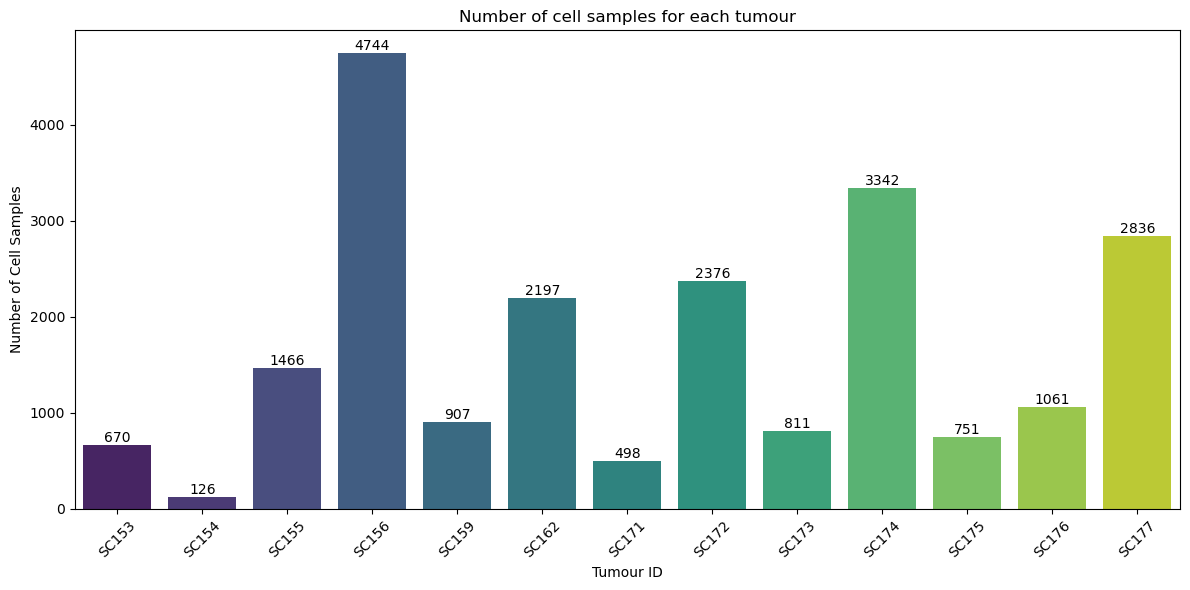

In [ ]:
# Plot the number of cell samples for each tumour sorted by tumourID
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=tumour_counts, x='tumourID', y='numCellSamples', palette='viridis', ax=ax)
plt.xlabel("Tumour ID")
plt.ylabel("Number of Cell Samples")
plt.title("Number of cell samples for each tumour")

# Add text labels for the cell counts above the bars
for index, row in tumour_counts.iterrows():
    ax.text(index, row['numCellSamples'], row['numCellSamples'], color='black', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



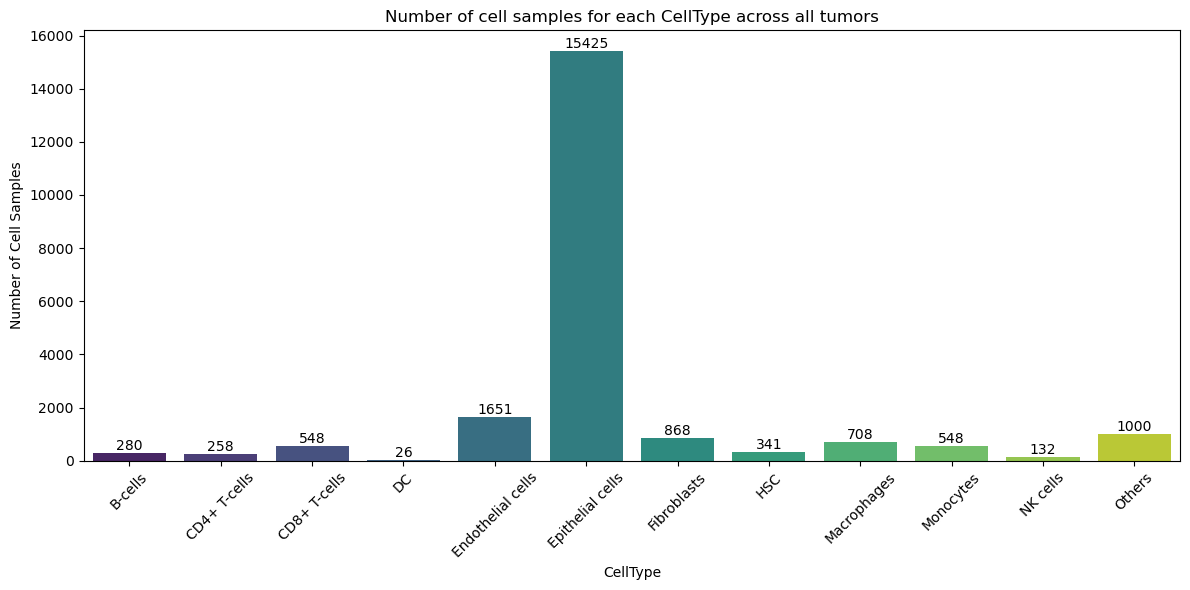

In [ ]:

# Plot the number of cell samples for each CellType across all tumors
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=celltype_counts, x='CellType', y='CellSamples', palette='viridis', ax=ax)
plt.xticks(rotation=45)
plt.xlabel("CellType")
plt.ylabel("Number of Cell Samples")
plt.title("Number of cell samples for each CellType across all tumors")
# Add text labels for the cell counts above the bars
for index, row in celltype_counts.iterrows():
    ax.text(index, row['CellSamples'], row['CellSamples'], color='black', ha='center', va='bottom')
plt.tight_layout()
plt.show()


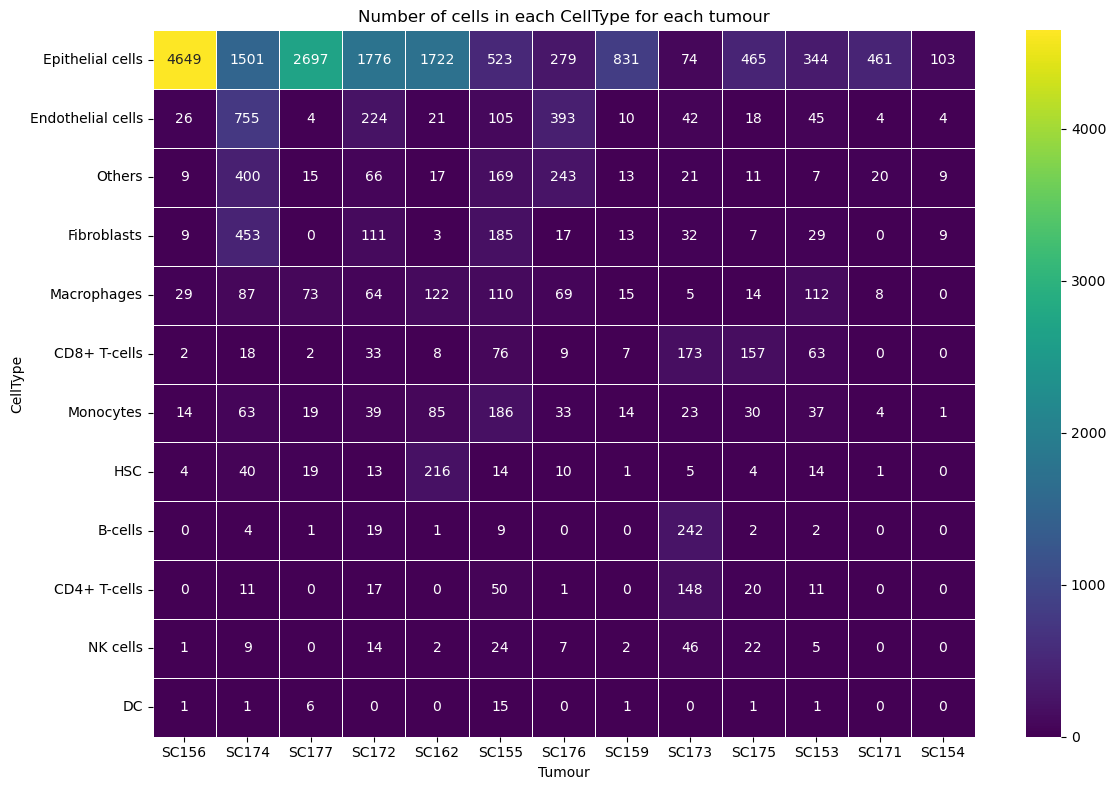

In [ ]:

# Count the number of cells in each CellType for each tumour
tumour_celltype_counts = df.groupby(['tumourID', 'CellType']).size().reset_index(name='CellCount')
tumour_order = tumour_celltype_counts.groupby('tumourID')['CellCount'].sum().sort_values(ascending=False).index
celltype_order = tumour_celltype_counts.groupby('CellType')['CellCount'].sum().sort_values(ascending=False).index

heatmap_data = tumour_celltype_counts.pivot_table(index='CellType', columns='tumourID', values='CellCount', fill_value=0)

# Reorder the pivot table according to the size of tumours and cell types
heatmap_data = heatmap_data.reindex(index=celltype_order, columns=tumour_order)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=0.5)
plt.xlabel("Tumour")
plt.ylabel("CellType")
plt.title("Number of cells in each CellType for each tumour")
plt.tight_layout()
plt.show()



# 代码草稿

In [ ]:
# feature selection by identifying top 5000 highly variable genes

# Separate numerical and non-numerical columns
df_numeric = df_final.select_dtypes(include=np.number)
df_non_numeric = df_final.select_dtypes(exclude=np.number)

# Calculate coefficient of variation for each gene (column)
mean_expression = df_numeric.mean()
std_dev_expression = df_numeric.std()
coeff_of_var = std_dev_expression / mean_expression
print(coeff_of_var)
# Sort genes by coefficient of variation in descending order
sorted_genes = coeff_of_var.sort_values(ascending=False)

# Select top 5000 highly variable genes
top_hvg = sorted_genes[:10000].index
print(top_hvg)

RP11-34P13.7      10.620845
RP11-34P13.8      63.283189
FO538757.2         2.581601
AP006222.2         3.048687
RP4-669L17.10     13.544076
                    ...    
BX072566.1        88.298447
AL354822.1        10.582407
AC023491.2       124.478914
AC004556.1        28.880355
AC240274.1         2.869242
Length: 23990, dtype: float64
Index(['IGLV3-1', 'AP001626.1', 'AC019118.4', 'AL109761.5', 'USP41',
       'RP5-1184F4.5', 'IGKV1-39', 'LINC01163', 'CTD-2555O16.1', 'FBXO40',
       ...
       'B3GNT9', 'COLCA2', 'PLCL2', 'UBASH3B', 'RP11-15A1.7', 'PINK1-AS',
       'AMTN', 'PAXBP1-AS1', 'IQCD', 'SLC35G1'],
      dtype='object', length=10000)


In [ ]:
coeff_of_var_sorted = coeff_of_var.sort_values(ascending=False)
coeff_of_var_sorted

IGLV3-1       124.478914
AP001626.1    124.478914
AC019118.4    124.478914
AL109761.5    124.478914
USP41         124.478914
                 ...    
EEF1A1          0.060229
RPL13A          0.054314
RPL10           0.053561
RPS18           0.052991
RPLP1           0.051241
Length: 23990, dtype: float64

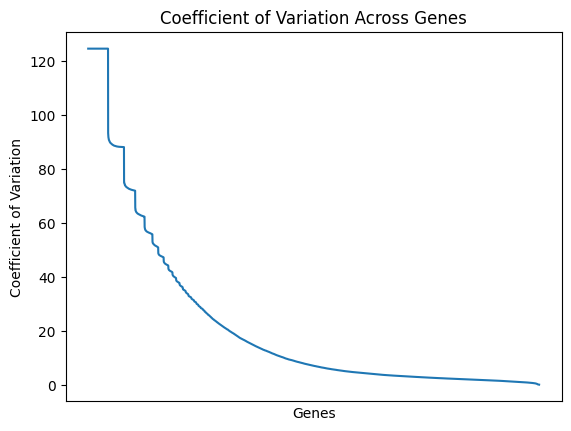

In [ ]:
# Plotting
plt.plot(coeff_of_var_sorted.index, coeff_of_var_sorted.values)
plt.xlabel("Genes")
plt.ylabel("Coefficient of Variation")
plt.xticks([])
plt.title("Coefficient of Variation Across Genes")
plt.show()


In [ ]:
# Select genes where coefficient of variation is greater than 20
selected_genes = coeff_of_var[coeff_of_var 0]

# Filter the original data to include only the selected genes
filtered_data = df_numeric.loc[:, selected_genes.index]

display(filtered_data)

,RP11-34P13.8,RP5-857K21.4,RP5-857K21.2,FAM87B,RP11-54O7.16,RP11-54O7.3,RP11-54O7.11,RP11-54O7.18,LINC01342,TTLL10,...,AP001469.7,AC136616.1,AC136352.5,AC136352.4,AC171558.1,BX004987.4,AC007325.1,BX072566.1,AC023491.2,AC004556.1
907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Select these genes
df_numeric_hvg = df_numeric[top_hvg]
# Concatenate the numerical and non-numerical data
df_hvg = pd.concat([df_numeric_hvg, df_non_numeric], axis=1)
display(df_hvg)

,IGLV3-1,AP001626.1,AC019118.4,AL109761.5,USP41,RP5-1184F4.5,IGKV1-39,LINC01163,CTD-2555O16.1,FBXO40,...,UBASH3B,RP11-15A1.7,PINK1-AS,AMTN,PAXBP1-AS1,IQCD,SLC35G1,reference,tumourID,CellType
907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages
908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,AACGTTGCATCGGACC-2,SC162,Epithelial cells
909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,TTGAACGGTCTCAACA-2,SC162,Epithelial cells
910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,GGACGTCCAACACCTA-2,SC162,Epithelial cells
911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,TACGGGCCATGCAACT-2,SC162,Epithelial cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.048386,0.0,0.0,0.0,0.0,0.0,0.0,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells
21111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells
21112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.435357,0.0,0.0,0.0,0.0,0.0,0.0,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells
21113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells


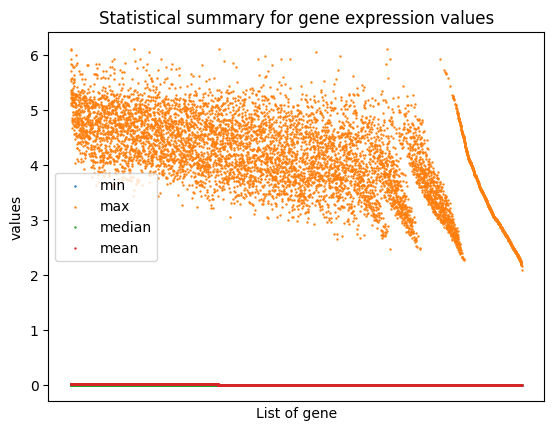

In [ ]:
dis = filtered_data

# Compute the min, max, median, and mean for each column
stats_df = pd.DataFrame({
    'min': dis.min(),
    'max': dis.max(),
    'median': dis.median(),
    'mean': dis.mean()
})

df_sorted = stats_df.sort_values('mean',ascending = False)
# Create a scatter plot for each row
fig, ax = plt.subplots()

for column in df_sorted.columns:
    ax.scatter(x=df_sorted.index, y=df_sorted[column], label=column, s=0.5)  # s parameter controls the size of the dots

plt.ylabel('values')
plt.xlabel('List of gene')
plt.xticks([])
plt.title('Statistical summary for gene expression values')
ax.legend()

plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA object
# Here we're reducing the dimensionality to 10, but you can specify any number that's less than the number of genes (columns) in your dataset
pca = PCA(n_components=500)

# Fit and transform the data to the PCA model
pca_result = pca.fit_transform(filtered_data)

# Convert the result back to a DataFrame
df_pca = pd.DataFrame(pca_result, columns=['PC'+str(i) for i in range(1, pca.n_components_+1)])

display(df_pca)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
0,-0.081435,-0.073739,-0.003981,-0.042142,-0.089686,-0.049490,0.022428,0.051282,0.058182,-0.026444,...,0.124802,-0.062510,0.087214,0.167787,-0.043066,-0.127561,-0.297269,-0.122222,-0.083081,0.168266
1,-0.040331,-0.047466,0.192506,0.020735,-0.157844,0.028677,0.067056,0.075096,-0.055514,-0.070048,...,-0.035352,0.037772,0.176930,-0.240415,-0.051312,0.171253,0.167890,-0.056919,-0.156093,-0.157435
2,-0.026812,-0.101861,0.141601,0.004487,-0.200273,-0.065892,0.059755,0.137251,0.042374,-0.057204,...,0.169246,-0.349195,-0.097881,-0.167177,-0.009275,-0.002356,-0.147142,-0.332377,0.133091,0.272686
3,-0.076520,-0.111170,0.015536,0.003412,-0.083524,-0.062061,0.077498,0.031583,0.056345,0.014179,...,0.190113,0.063270,0.113561,0.046220,-0.033299,0.219309,-0.008797,-0.219155,-0.214692,0.353083
4,-0.071139,-0.159136,-0.036776,-0.061529,-0.073324,-0.070281,-0.013618,0.118644,0.010324,0.066478,...,0.261792,0.087357,0.142522,0.085433,0.041198,-0.238888,0.043843,0.150248,-0.179336,0.341076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,0.396325,0.155528,0.413442,0.201853,0.016349,-0.055955,-0.312004,0.063425,-0.029585,0.173444,...,-0.188452,0.162784,0.116274,-0.012431,0.070083,-0.140875,-0.295595,0.248658,0.216405,0.160772
15491,0.927518,-0.055909,0.736435,0.013263,1.502443,-0.126803,-1.690415,-0.621256,0.309523,0.436549,...,-0.477312,0.534400,-0.178484,-0.264910,0.048221,0.105742,-0.006830,-0.169237,-0.094093,0.302951
15492,0.121892,-0.010331,0.252288,-0.043536,0.525362,-0.016829,-0.607466,-0.390390,-0.189495,0.704355,...,0.488502,-0.174793,-0.193478,-0.289448,-0.402675,0.236737,0.040409,0.088339,0.180232,0.296154
15493,0.836322,-0.022333,0.663052,-0.051953,2.209025,-0.058242,-1.405205,-0.631172,0.411850,-0.441228,...,-0.061655,0.086103,0.640771,0.302015,0.149214,0.076144,0.479435,0.370625,-0.201551,0.137200


In [ ]:
df_non_numeric = df_non_numeric.reset_index(drop=True)
display(df_non_numeric)


,reference,tumourID,CellType
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells
...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells


In [ ]:
# Concatenate the numerical and non-numerical data
df_hvg =  pd.concat([df_non_numeric, df_pca], axis=1)
display(df_hvg)

,reference,tumourID,CellType,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,-0.081435,-0.073739,-0.003981,-0.042142,-0.089686,-0.049490,0.022428,...,0.124802,-0.062510,0.087214,0.167787,-0.043066,-0.127561,-0.297269,-0.122222,-0.083081,0.168266
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,-0.040331,-0.047466,0.192506,0.020735,-0.157844,0.028677,0.067056,...,-0.035352,0.037772,0.176930,-0.240415,-0.051312,0.171253,0.167890,-0.056919,-0.156093,-0.157435
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,-0.026812,-0.101861,0.141601,0.004487,-0.200273,-0.065892,0.059755,...,0.169246,-0.349195,-0.097881,-0.167177,-0.009275,-0.002356,-0.147142,-0.332377,0.133091,0.272686
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,-0.076520,-0.111170,0.015536,0.003412,-0.083524,-0.062061,0.077498,...,0.190113,0.063270,0.113561,0.046220,-0.033299,0.219309,-0.008797,-0.219155,-0.214692,0.353083
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,-0.071139,-0.159136,-0.036776,-0.061529,-0.073324,-0.070281,-0.013618,...,0.261792,0.087357,0.142522,0.085433,0.041198,-0.238888,0.043843,0.150248,-0.179336,0.341076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.396325,0.155528,0.413442,0.201853,0.016349,-0.055955,-0.312004,...,-0.188452,0.162784,0.116274,-0.012431,0.070083,-0.140875,-0.295595,0.248658,0.216405,0.160772
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.927518,-0.055909,0.736435,0.013263,1.502443,-0.126803,-1.690415,...,-0.477312,0.534400,-0.178484,-0.264910,0.048221,0.105742,-0.006830,-0.169237,-0.094093,0.302951
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.121892,-0.010331,0.252288,-0.043536,0.525362,-0.016829,-0.607466,...,0.488502,-0.174793,-0.193478,-0.289448,-0.402675,0.236737,0.040409,0.088339,0.180232,0.296154
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.836322,-0.022333,0.663052,-0.051953,2.209025,-0.058242,-1.405205,...,-0.061655,0.086103,0.640771,0.302015,0.149214,0.076144,0.479435,0.370625,-0.201551,0.137200


In [ ]:
X = df_hvg.drop(['reference','tumourID','CellType'], axis=1)
y = df_hvg['tumourID']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Support Vector Machine (LinearSVC is more scalable than SVC with linear kernel)
model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)


Linear SVM Accuracy: 0.5876089060987415
              precision    recall  f1-score   support

       SC162       0.52      0.83      0.64       917
       SC174       0.62      0.41      0.49       429
       SC172       0.64      0.47      0.54       487
       SC177       0.68      0.57      0.62       681
       SC156       0.65      0.46      0.54       585

    accuracy                           0.59      3099
   macro avg       0.62      0.55      0.57      3099
weighted avg       0.61      0.59      0.58      3099



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# 剔除无用cell

In [ ]:
selected_df

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
907,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
908,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
909,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
910,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
911,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21111,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21112,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
21113,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
# Assuming 'df' is your DataFrame and 'CellType' is the column containing cell types
selected_df['is_Epithelial_cells'] = selected_df['CellType'].apply(lambda x: 'yes' if x == 'Epithelial cells' else 'no')


In [ ]:
selected_df

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1,is_Epithelial_cells
907,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,no
908,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000,yes
909,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,yes
910,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547,yes
911,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,yes
21111,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,yes
21112,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,yes
21113,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,yes


In [ ]:
selected_df['is_Epithelial_cells'] = selected_df['CellType'].apply(lambda x: 'yes' if x == 'Epithelial cells' else 'no')

counts = selected_df['is_Epithelial_cells'].value_counts()

print(counts)


yes    12345
no      3150
Name: is_Epithelial_cells, dtype: int64
